In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('C://Users//Hp//Downloads//day.csv', parse_dates= True)

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
data.shape

(730, 16)

In [8]:
# renaming few columns for better readibility

data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(730, 12)

## Data cleaning and visualization

In [12]:
#changing categorical data which were primarily numeric so that we will have coefficients for every values of the column
data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

data.month = data.month.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

data.weekday = data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
corr = data.corr()

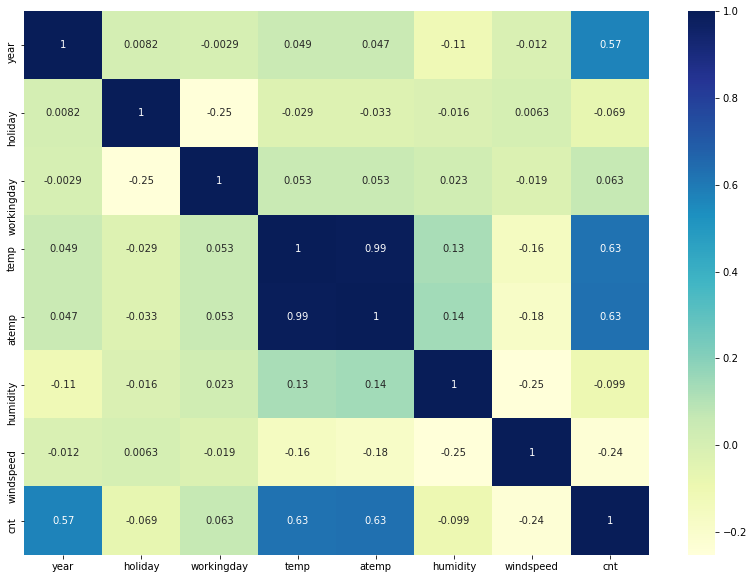

In [14]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True,  cmap="YlGnBu")
plt.show()

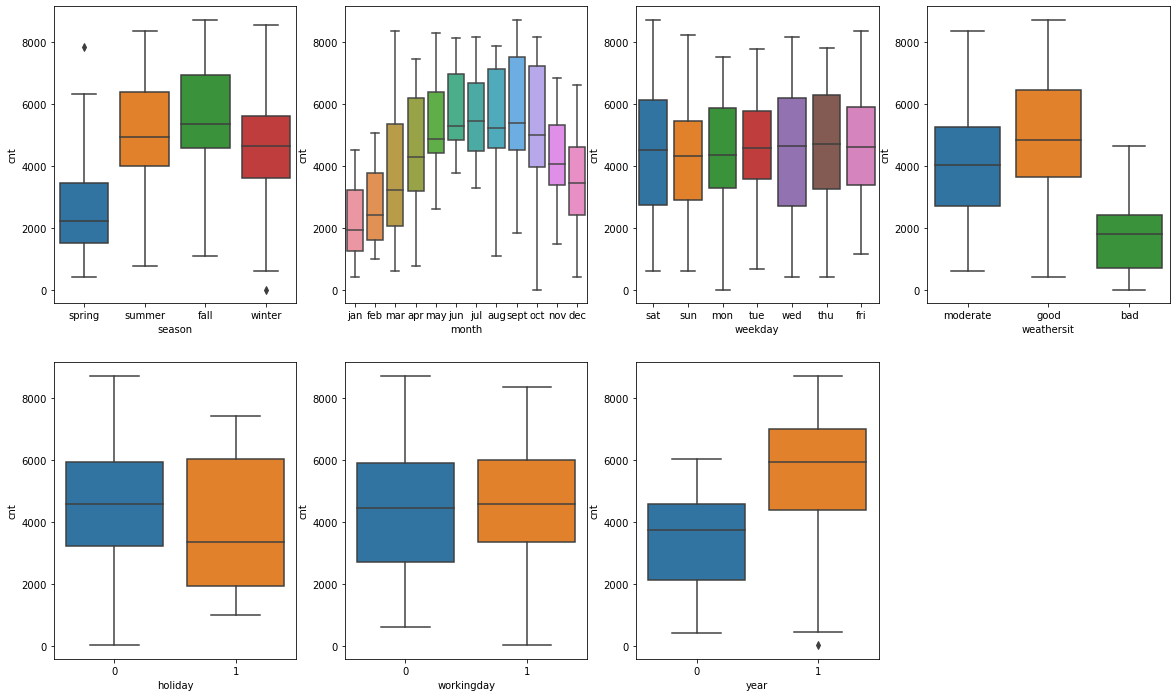

In [15]:
# Analysing/visualizing the categorical columns and checking for outliers
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = data)
plt.show()

<AxesSubplot:xlabel='season', ylabel='cnt'>

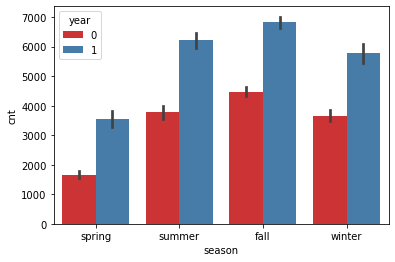

In [16]:
sns.barplot('season','cnt',data=data, hue='year',palette='Set1')

### There is a high increase in demands in every seaoson in year 2019 

<AxesSubplot:xlabel='month', ylabel='cnt'>

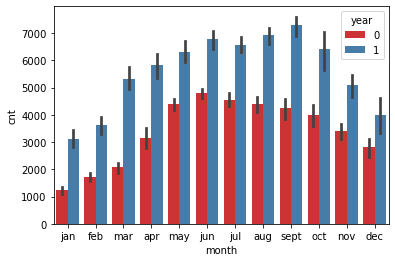

In [17]:
sns.barplot('month','cnt',data=data, hue='year',palette='Set1')

### There is a high increase in demands in every seaoson in year 2019

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

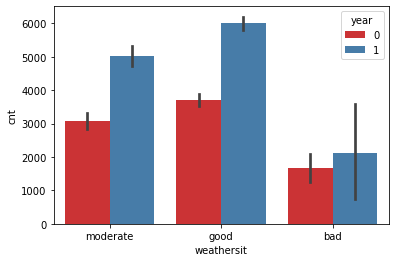

In [18]:
sns.barplot('weathersit','cnt',data=data, hue='year',palette='Set1')

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

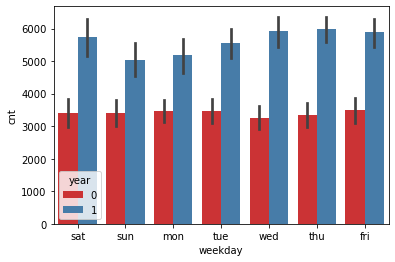

In [19]:
sns.barplot('weekday','cnt',data=data, hue='year',palette='Set1')

### There is a high increase in demands in every seaoson in year 2019

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

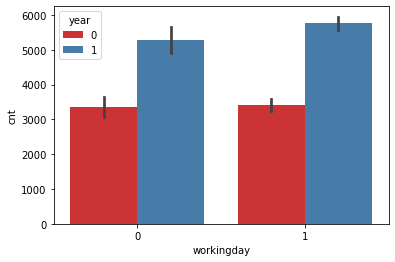

In [20]:
sns.barplot('workingday','cnt',data=data, hue='year',palette='Set1')

<AxesSubplot:xlabel='year', ylabel='cnt'>

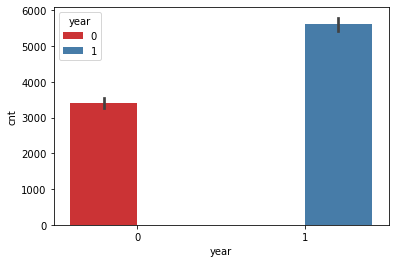

In [21]:
sns.barplot('year','cnt',data=data, hue='year',palette='Set1')

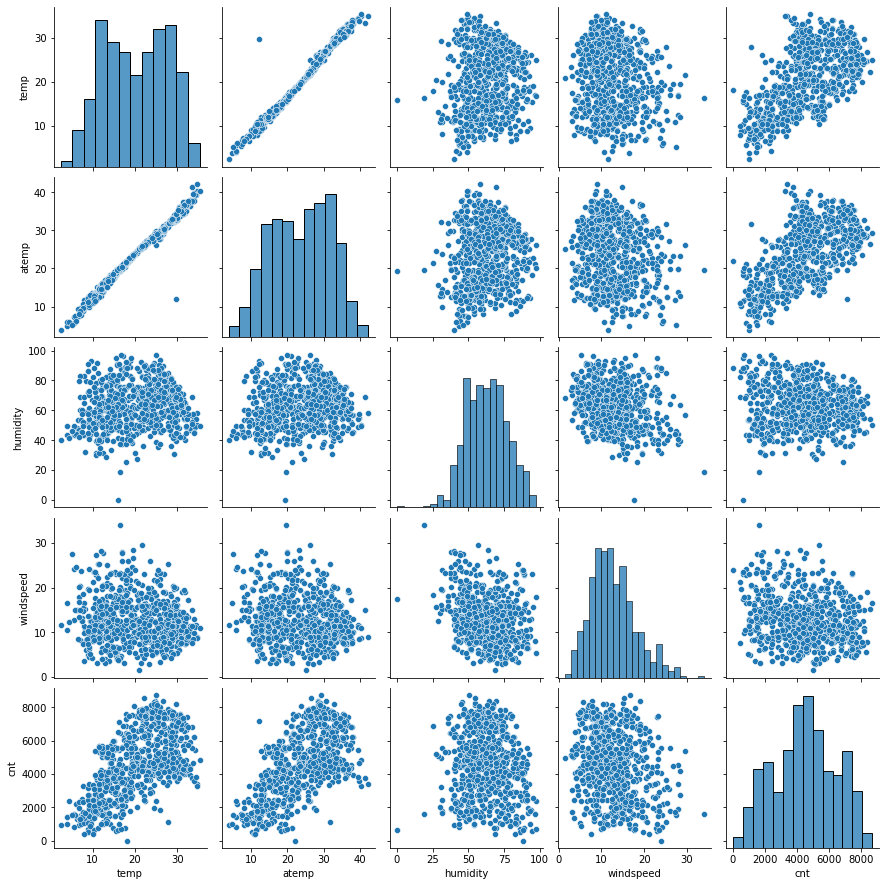

In [22]:
sns.pairplot(data=data,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

### from above plot it is clear that temp and atemp have high correleated  so we can drop one of them

In [23]:
data.drop(columns= 'atemp', inplace= True)

In [24]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,43.6957,12.522300,1600


##  Data Preparation 

In [25]:
data = pd.get_dummies(data=data,columns=["season","month","weekday"],drop_first=True)
data = pd.get_dummies(data=data,columns=["weathersit"])

In [26]:
data.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [27]:
data.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,1,0


# Split data into train and test

In [28]:
#y to contain only target variable
y=data.pop('cnt')

#X is all remainign variable also our independent variables
X=data

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_train.shape, X_test.shape

((511, 29), (219, 29))

In [30]:
# Let us scale continuous variables
num_vars = ['temp','humidity','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [31]:
X_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,month_aug,...,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.654174,0.414873,0.230920,0.258317,0.250489,0.074364,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.143648,0.185619,0.421834,0.438138,0.433719,0.262619,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.544598,0.281934,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.659940,0.384732,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.756977,0.526481,0.000000,1.000000,0.500000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model using linear regression  

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
rfe = RFE(estimator=lr, n_features_to_select=20)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [34]:
#Columns selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', False, 6),
 ('month_dec', True, 1),
 ('month_feb', False, 3),
 ('month_jan', False, 10),
 ('month_jul', True, 1),
 ('month_jun', False, 9),
 ('month_mar', True, 1),
 ('month_may', True, 1),
 ('month_nov', True, 1),
 ('month_oct', True, 1),
 ('month_sept', True, 1),
 ('weekday_mon', False, 5),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 4),
 ('weekday_thu', False, 8),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 7),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [35]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm


In [36]:
#Function to calculate VIFs and print them 
def VIF_calculator(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [37]:
#Print Columnsselected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_dec',
       'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [38]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
     'season_winter', 'season_summer','month_dec', 'month_jul','month_mar','month_may','month_nov' ,'month_oct','month_sept',
                       'weekday_sat', 'weathersit_bad','weathersit_good','weathersit_moderate']]

In [39]:
X_train_rfe.shape

(511, 20)

### Model creation  

In [40]:
cols = X_train_rfe.columns
build_model(cols)
VIF_calculator(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     142.2
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.22e-185
Time:                        11:08:17   Log-Likelihood:                -4114.3
No. Observations:                 511   AIC:                             8269.
Df Residuals:                     491   BIC:                             8353.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1496.9215    

In [41]:
# Dropping the variable weathersit good and building the model again
cols = ['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
     'season_winter', 'season_summer','month_dec', 'month_jul','month_mar','month_may','month_nov' ,'month_oct','month_sept',
                       'weekday_sat', 'weathersit_bad','weathersit_moderate']
build_model(cols)
VIF_calculator(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     142.2
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.22e-185
Time:                        11:08:17   Log-Likelihood:                -4114.3
No. Observations:                 511   AIC:                             8269.
Df Residuals:                     491   BIC:                             8353.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2793.5545    

In [42]:
# Dropping the variable humidity and building the model again
cols = ['year', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
     'season_winter', 'season_summer','month_dec', 'month_jul','month_mar','month_may','month_nov' ,'month_oct','month_sept',
                       'weekday_sat', 'weathersit_bad','weathersit_moderate']
build_model(cols)
VIF_calculator(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     144.2
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          5.97e-183
Time:                        11:08:18   Log-Likelihood:                -4123.4
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     492   BIC:                             8365.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1972.4275    

In [43]:
# Dropping the variable season temp and building the model again
cols = ['year', 'holiday', 'workingday', 'windspeed', 'season_spring',
     'season_winter', 'season_summer','month_dec', 'month_jul','month_mar','month_may','month_nov' ,'month_oct','month_sept',
                       'weekday_sat', 'weathersit_bad','weathersit_moderate']
build_model(cols)
VIF_calculator(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     116.0
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          6.75e-160
Time:                        11:08:18   Log-Likelihood:                -4181.5
No. Observations:                 511   AIC:                             8399.
Df Residuals:                     493   BIC:                             8475.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4708.9078    

In [44]:
# Dropping the variable season winter and building the model again
cols = ['year', 'holiday', 'workingday', 'windspeed', 'season_spring',
      'season_summer','month_dec', 'month_jul','month_mar','month_may','month_nov' ,'month_oct','month_sept',
                       'weekday_sat', 'weathersit_bad','weathersit_moderate']
build_model(cols)
VIF_calculator(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     123.4
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          6.67e-161
Time:                        11:08:18   Log-Likelihood:                -4181.6
No. Observations:                 511   AIC:                             8397.
Df Residuals:                     494   BIC:                             8469.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4691.7303    

In [45]:
# Dropping the variable holiday and building the model again
cols = ['year', 'workingday', 'windspeed', 'season_spring',
      'season_summer','month_dec', 'month_jul','month_mar','month_may','month_nov' ,'month_oct','month_sept',
                       'weekday_sat', 'weathersit_bad','weathersit_moderate']
build_model(cols)
VIF_calculator(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     131.5
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.15e-161
Time:                        11:08:18   Log-Likelihood:                -4182.3
No. Observations:                 511   AIC:                             8397.
Df Residuals:                     495   BIC:                             8464.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4649.4706    

In [46]:
# Dropping the variable monthjul and building the model again
cols = ['year', 'workingday', 'windspeed', 'season_spring',
      'season_summer','month_dec','month_mar','month_may','month_nov' ,'month_oct','month_sept',
                       'weekday_sat', 'weathersit_bad','weathersit_moderate']
build_model(cols)
VIF_calculator(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     141.1
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          9.57e-163
Time:                        11:08:18   Log-Likelihood:                -4182.3
No. Observations:                 511   AIC:                             8395.
Df Residuals:                     496   BIC:                             8458.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4658.2300    

In [47]:
# Dropping the variable monthoct and building the model again
col = ['year', 'workingday', 'windspeed', 'season_spring',
      'season_summer','month_dec','month_mar','month_may','month_nov' ,'month_sept',
                       'weekday_sat', 'weathersit_bad','weathersit_moderate']
build_model(col)
VIF_calculator(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     152.0
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.15e-163
Time:                        11:08:18   Log-Likelihood:                -4182.7
No. Observations:                 511   AIC:                             8393.
Df Residuals:                     497   BIC:                             8453.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4702.2787    

### here the p value as well as vif looks stable so we will build model using these features.

In [48]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1


In [49]:
lr = build_model_sk(X_train[col],y_train)
print(lr.intercept_,lr.coef_)

4702.278730964087 [ 2036.73448468   458.90470544  -984.82710889 -2809.64001113
  -513.01467911  -915.26454616   519.28508559   428.70307054
 -1173.93920906   460.79184014   445.18299173 -2487.3306938
  -745.54143274]


### Residual analysis

In [50]:
y_train_pred = lr.predict(X_train[col])

Text(0.5, 0, 'Errors')

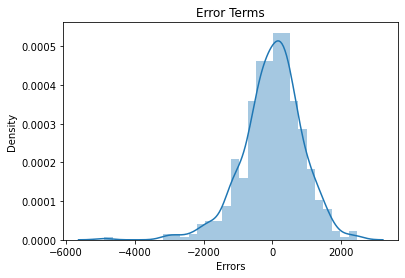

In [51]:
#Plot a histogram of the error terms
sns.distplot(y_train-y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

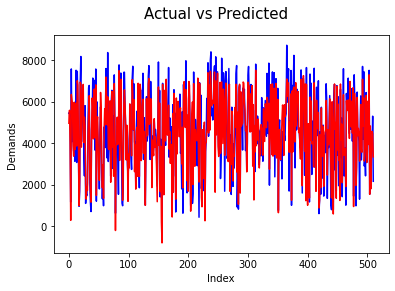

In [52]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Model predictions

In [53]:
#Print R-squared Value
print('r2 score for training :',  r2_score(y_train,y_train_pred))

r2 score for training : 0.7989925670707397


### predictions on test dataset   

In [54]:
#Scale variables in X_test
num_vars = ['temp','humidity','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [55]:
#Predicting test data values
y_test_pred = lr.predict(X_test[col])

In [56]:
r2_score(y_test,y_test_pred)

0.7617950314177837

Text(0, 0.5, 'y_test_pred')

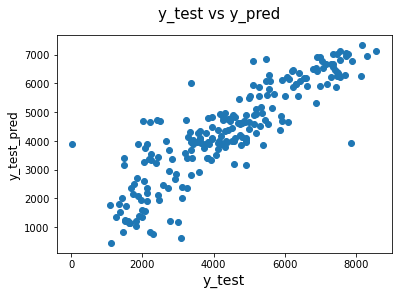

In [57]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_test_pred', fontsize = 12)

Conclusion

Significant variables to predict the demand for shared bikes
holiday
temp
hum
windspeed
Season
months(July, September, November, December)
Year
Sunday
weathersit( Light Snow, Mist + Cloud